# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
%matplotlib inline

In [7]:
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [8]:
twitter_archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [9]:
import requests

In [10]:
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [11]:
with open('image_predictions.tsv','wb') as wb:
    wb.write(r.content)

In [12]:
img_df = pd.read_csv('image_predictions.tsv',sep = '\t')

In [13]:
img_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [14]:
#I had issues getting my developer account running so i had to use the downloaded tweet_json.txt file given to us
# To extract data from the json file and create a dataframe from it containing the required column
my_list = []
with open('tweet-json.txt', encoding='utf-8') as json_file:  
    all_data = [json.loads(line) for line in json_file]
    # we want to extract data for specific columns from each tweet line by line into a list
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        whole_tweet = each_dictionary['full_text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        followers_count = each_dictionary['user']['followers_count']
        friends_count = each_dictionary['user']['friends_count']
        whole_source = each_dictionary['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = each_dictionary['retweeted_status'] = each_dictionary.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'

        my_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'followers_count': int(followers_count),
                             'friends_count': int(friends_count),
                             'url': url,
                             'source': source,
                             'retweeted_status': retweeted_status,
                            })
        
        tweet_json = pd.DataFrame(my_list, columns = ['tweet_id', 'favorite_count','retweet_count', 
                                                           'followers_count', 'friends_count','source', 
                                                           'retweeted_status', 'url'])

In [15]:
tweet_json

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,39467,8853,3200889,104,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,33819,6514,3200889,104,Twitter for iPhone,Original tweet,https://t.co/0Xxu71qeIV
2,891815181378084864,25461,4328,3200889,104,Twitter for iPhone,Original tweet,https://t.co/wUnZnhtVJB
3,891689557279858688,42908,8964,3200889,104,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,41048,9774,3200889,104,Twitter for iPhone,Original tweet,https://t.co/AtUZn91f7f
...,...,...,...,...,...,...,...,...
2349,666049248165822465,111,41,3201018,104,Twitter for iPhone,Original tweet,https://t.co/4B7cOc1EDq
2350,666044226329800704,311,147,3201018,104,Twitter for iPhone,Original tweet,https://t.co/DWnyCjf2mx
2351,666033412701032449,128,47,3201018,104,Twitter for iPhone,Original tweet,https://t.co/y671yMhoiR
2352,666029285002620928,132,48,3201018,104,Twitter for iPhone,Original tweet,https://t.co/r7mOb2m0UI


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



LOOKING AT TWITTER_ARCHIVE_DF DATA,

In [16]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [17]:
sum(twitter_archive_df['tweet_id'].duplicated())

0

In [18]:
twitter_archive_df['retweeted_status_user_id'].isnull().sum()

2175

In [19]:
twitter_archive_df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1427,697630435728322560,NaN,NaN,2016-02-11 03:57:11 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Pls make sure ur dogs have gone through some b...,NaN,NaN,NaN,https://vine.co/v/in7ZzHPKzWz,8,10,None,None,None,None,None
389,826476773533745153,NaN,NaN,2017-01-31 17:06:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pilot. He has mastered the synchronize...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/826476773...,12,10,Pilot,doggo,None,None,None
1812,676811746707918848,NaN,NaN,2015-12-15 17:11:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Penny &amp; Gizmo. They are pract...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676811746...,9,10,Penny,None,None,None,None
1496,692530551048294401,NaN,NaN,2016-01-28 02:12:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Cody. He's been to like 80 countr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692530551...,10,10,Cody,None,None,None,None
358,830097400375152640,NaN,NaN,2017-02-10 16:53:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Samson. He's absolute fluffy perfection. ...,NaN,NaN,NaN,"https://www.gofundme.com/sick-baby-samson,http...",13,10,Samson,None,None,None,None
1501,692142790915014657,6.920419e+17,4.196984e+09,2016-01-27 00:31:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",These are some pictures of Teddy that further ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692142790...,13,10,None,None,None,None,None
1673,682303737705140231,NaN,NaN,2015-12-30 20:54:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Todo. He's screaming because he doesn'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682303737...,9,10,Todo,None,None,None,None
2057,671355857343524864,NaN,NaN,2015-11-30 15:51:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lou. He's a Petrarch Sunni Pinto. Well...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671355857...,10,10,Lou,None,None,None,None
1047,743510151680958465,NaN,NaN,2016-06-16 18:26:48 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","This is Beya. She doesn't want to swim, so she...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/743510151...,13,10,Beya,None,None,None,None
2253,667793409583771648,NaN,NaN,2015-11-20 19:55:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Dogs only please. Small cows and other non can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667793409...,8,10,None,None,None,None,None


In [20]:
#some numerator and denominator are decimals
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_df[twitter_archive_df['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\Users\Hp\anaconda3\envs\data_analysis\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [21]:
# lets see the numerator ratings
twitter_archive_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [22]:

print(twitter_archive_df.loc[twitter_archive_df.rating_numerator == 204, 'text']) 
print(twitter_archive_df.loc[twitter_archive_df.rating_numerator == 143, 'text']) 
print(twitter_archive_df.loc[twitter_archive_df.rating_numerator == 666, 'text']) 
print(twitter_archive_df.loc[twitter_archive_df.rating_numerator == 1176, 'text'])
print(twitter_archive_df.loc[twitter_archive_df.rating_numerator == 144, 'text'])

1120    Say hello to this unbelievably well behaved sq...
Name: text, dtype: object
1634    Two sneaky puppers were not initially seen, mo...
Name: text, dtype: object
189    @s8n You tried very hard to portray this good ...
Name: text, dtype: object
Series([], Name: text, dtype: object)
1779    IT'S PUPPERGEDDON. Total of 144/120 ...I think...
Name: text, dtype: object


In [23]:
#print whole text in order to verify numerators and denominators
print(twitter_archive_df['text'][1120]) #17 dogs
print(twitter_archive_df['text'][1634]) #13 dogs
print(twitter_archive_df['text'][313]) #not a tweet for rating
print(twitter_archive_df['text'][189]) #doesnt possess image
print(twitter_archive_df['text'][1779]) #12 dogs

Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3
@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq


In [24]:
# lets check the values of denominator
twitter_archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

Some of the denominators are not equal to 10. we need to print out the text for each row containing them

In [25]:
print(twitter_archive_df.loc[twitter_archive_df.rating_denominator == 11, 'text']) 
print(twitter_archive_df.loc[twitter_archive_df.rating_denominator == 2, 'text']) 
print(twitter_archive_df.loc[twitter_archive_df.rating_denominator == 16, 'text']) 
print(twitter_archive_df.loc[twitter_archive_df.rating_denominator == 15, 'text'])
print(twitter_archive_df.loc[twitter_archive_df.rating_denominator == 7, 'text'])
print(twitter_archive_df.loc[twitter_archive_df.rating_denominator == 50, 'text'])
print(twitter_archive_df.loc[twitter_archive_df.rating_denominator == 80, 'text'])

784     RT @dog_rates: After so many requests, this is...
1068    After so many requests, this is Bretagne. She ...
1662    This is Darrel. He just robbed a 7/11 and is i...
Name: text, dtype: object
2335    This is an Albanian 3 1/2 legged  Episcopalian...
Name: text, dtype: object
1663    I'm aware that I could've said 20/16, but here...
Name: text, dtype: object
342    @docmisterio account started on 11/15/15
Name: text, dtype: object
516    Meet Sam. She smiles 24/7 &amp; secretly aspir...
Name: text, dtype: object
1202    This is Bluebert. He just saw that both #Final...
1274    From left to right:\nCletus, Jerome, Alejandro...
1351    Here is a whole flock of puppers.  60/50 I'll ...
Name: text, dtype: object
1254    Here's a brigade of puppers. All look very pre...
1843    Here we have an entire platoon of puppers. Tot...
Name: text, dtype: object


The text above is truncated, lets get the full text

In [26]:
print(twitter_archive_df['text'][784]) #retweet - to be deleted
print(twitter_archive_df['text'][1068]) # the actual rating is 14/10, to be changed 
print(twitter_archive_df['text'][1662]) #the actual rating is 10/10, to changed
print(twitter_archive_df['text'][2335]) #the actual rating 9/10, to changed 
print(twitter_archive_df['text'][1663]) # tweet to explain rating
print(twitter_archive_df['text'][342]) #no rating - delete
print(twitter_archive_df['text'][516]) #no rating - delete


RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible
@docmisterio account started on 11/15/15
Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx


LETS GO TO THE IMG_DF DATA

In [27]:
#lets get some information about the dataset
img_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [28]:
img_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
92,667546741521195010,https://pbs.twimg.com/media/CUOaOWXWcAA0_Jy.jpg,1,toy_poodle,0.787424,True,miniature_poodle,0.202225,True,teddy,0.004047,False
1116,725729321944506368,https://pbs.twimg.com/media/ChJO9YaWYAEL0zC.jpg,1,boxer,0.599076,True,bull_mastiff,0.177318,True,French_bulldog,0.141461,True
79,667453023279554560,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,1,Labrador_retriever,0.825670,True,French_bulldog,0.056639,True,Staffordshire_bullterrier,0.054018,True
1665,812503143955202048,https://pbs.twimg.com/media/C0aXTLqXEAADxBi.jpg,2,loupe,0.546856,False,web_site,0.345298,False,bubble,0.010528,False
339,672245253877968896,https://pbs.twimg.com/media/CVRLfeoW4AA_ldZ.jpg,1,Chihuahua,0.718944,True,badger,0.178546,False,toy_terrier,0.037103,True
1177,737800304142471168,https://pbs.twimg.com/media/Cj0xdMBVAAEbDHp.jpg,1,malamute,0.374682,True,Norwegian_elkhound,0.334853,True,limousine,0.068173,False
815,692752401762250755,https://pbs.twimg.com/tweet_video_thumb/CZ0mhd...,1,Samoyed,0.471276,True,Siberian_husky,0.158850,True,Eskimo_dog,0.138672,True
943,704347321748819968,https://pbs.twimg.com/media/CcZYJniXEAAEJRF.jpg,1,teddy,0.233378,False,feather_boa,0.088474,False,Brittany_spaniel,0.082917,True
1796,831322785565769729,https://pbs.twimg.com/media/C4lzqQ4UEAApzU0.jpg,1,Old_English_sheepdog,0.999715,True,Tibetan_terrier,0.000046,True,guinea_pig,0.000041,False
829,693622659251335168,https://pbs.twimg.com/media/CaA-IR9VIAAqg5l.jpg,1,malamute,0.449298,True,Siberian_husky,0.385075,True,Eskimo_dog,0.163485,True


In [29]:
# lets check for duplicate jpg. url
sum(img_df.jpg_url.duplicated())

66

In [30]:
#we want to keep the true predictions hence lets know their frequency
print(img_df.p1_dog.value_counts())
print(img_df.p2_dog.value_counts())
print(img_df.p3_dog.value_counts())

True     1532
False     543
Name: p1_dog, dtype: int64
True     1553
False     522
Name: p2_dog, dtype: int64
True     1499
False     576
Name: p3_dog, dtype: int64


 NOW TO TWEET_JSON DATA

In [31]:
#lets see what its all about
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2354 non-null   object
 1   favorite_count    2354 non-null   int64 
 2   retweet_count     2354 non-null   int64 
 3   followers_count   2354 non-null   int64 
 4   friends_count     2354 non-null   int64 
 5   source            2354 non-null   object
 6   retweeted_status  2354 non-null   object
 7   url               2354 non-null   object
dtypes: int64(4), object(4)
memory usage: 147.2+ KB


In [32]:
tweet_json.sample(10)

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
1017,746790600704425984,5345,1806,3200943,104,Twitter for iPhone,Original tweet,https://t.co/jeWEGUgbXf
1989,672622327801233409,1377,542,3201005,104,Twitter for iPhone,Original tweet,https://t.co/Cv7dRdcMvQ
424,821421320206483457,0,6470,3200894,104,Twitter for iPhone,This is a retweet,This is a retweet
2055,671355857343524864,508,119,3201008,104,Twitter for iPhone,Original tweet,https://t.co/FoCULrC3rD
95,873580283840344065,24837,4143,3200891,104,Twitter for iPhone,Original tweet,https://t.co/mNuMH9400n
398,824796380199809024,0,6288,3200894,104,Twitter for iPhone,This is a retweet,This is a retweet
1831,676146341966438401,2077,744,3201002,104,Twitter for iPhone,Original tweet,https://t.co/lmQRrNxaQu
1173,720043174954147842,5332,2253,3200945,104,Twitter for iPhone,Original tweet,https://t.co/SoZq2Xoopv
958,751205363882532864,6948,2086,3200943,104,Twitter for iPhone,Original tweet,https://t.co/510gJW9fsy
1083,738184450748633089,4727,1360,3200943,104,Twitter for iPhone,Original tweet,https://t.co/twxYcPOafl


In [33]:
#lets know what the retweeted_status contains
tweet_json.retweeted_status.value_counts()

Original tweet       2175
This is a retweet     179
Name: retweeted_status, dtype: int64

In [34]:
#lets know the various sources and their frequency
tweet_json.source.value_counts()

Twitter for iPhone     2219
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

### Quality issues
twitter_archive_df

1. the timestamp column is of wrong datatype

2. presence of retweets without images

3. some numerators are decimals and some are wrong

4. erroneous datatypes for pupper, doggo, floofer, puppo columns

5. lot of unwanted columns

6. some denominators are not equal to 10

img_df

7. multiple columns for image prediction and confidence level

8. duplicate jpg. url present

9. presence of unwanted columns to be dropped
 
tweet_json

10. presence of retweets in tweet_json data

### Tidiness issues
Twitter_archive_df

1. The dog classification; pupper, doggo, floofer and puppo violates the first rule of tidiness that each variable forms a column.

2. all the tables have one common column (tweet_id) hence all can be merged into one dataset, though tweet_json has tweet_id data with a different data type (object instead of int64)

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [35]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive_df.copy()
img_df_clean = img_df.copy()
tweet_json_clean = tweet_json.copy()

## Twitter_archive_df

### Issue #1: presence of retweets without images

#### Define:  Delete the retweets.

#### Code: 

In [36]:
#CODE: Delete retweets by filtering the NaN of retweeted_status_user_id
twitter_archive_clean = twitter_archive_clean[pd.isnull(twitter_archive_clean['retweeted_status_user_id'])]


#### Test

In [37]:

print(sum(twitter_archive_clean.retweeted_status_user_id.value_counts()))

0


### Issue #2: Lot of unwanted columns in twitter_archive_df

#### Define: drop the selected columns not needed for the analysis

#### Code: 

In [38]:
twitter_archive_clean = twitter_archive_clean.drop(['source',
                                                    'in_reply_to_status_id',
                                                    'in_reply_to_user_id',
                                                    'retweeted_status_id',
                                                    'retweeted_status_user_id', 
                                                    'retweeted_status_timestamp', 
                                                    'expanded_urls'], 1)

#### Test

In [39]:
list(twitter_archive_clean)

['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

### Issue #3: erroneous datatypes for pupper, doggo, floofer, puppo columns

#### Define: Using the melt function, melt the doggo, floofer, pupper and puppo columns to dogs and dogs_stage column. Then drop dogs column. Sort by dogs_stage in order to then drop duplicated based on tweet_id except for the last occurrence.

#### Code

In [40]:
twitter_archive_clean = pd.melt(twitter_archive_clean, id_vars=['tweet_id',                                          
                                                                'timestamp',
                                                                'text',
                                                                'rating_numerator',
                                                                'rating_denominator',
                                                                'name'],
                               var_name='dogs', value_name='dogs_stage')

twitter_archive_clean = twitter_archive_clean.drop('dogs', 1)

twitter_archive_clean = twitter_archive_clean.sort_values('dogs_stage').drop_duplicates(subset='tweet_id', 
                                                                                        keep='last')

#### Test

In [41]:
#check the datatype
twitter_archive_clean['dogs_stage'].value_counts()

None       1831
pupper      234
doggo        75
puppo        25
floofer      10
Name: dogs_stage, dtype: int64

### Issue #4: the timestamp column is of wrong datatype

#### Define: convert timestamp datatype to datetime, then separate into day-month-year

#### Code

In [42]:
#convert timestamp to datetime datatype
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

#get year, month and day to new columns
twitter_archive_clean['year'] = twitter_archive_clean['timestamp'].dt.year
twitter_archive_clean['month'] = twitter_archive_clean['timestamp'].dt.month
twitter_archive_clean['day'] = twitter_archive_clean['timestamp'].dt.day

#drop timestamp column
twitter_archive_clean = twitter_archive_clean.drop('timestamp', 1)

#### Test

In [43]:
twitter_archive_clean.head()

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,year,month,day
2095,667443425659232256,Exotic dog here. Long neck. Weird paws. Obsess...,6,10,None,None,2015,11,19
2094,667453023279554560,Meet Cupcake. I would do unspeakable things fo...,11,10,Cupcake,None,2015,11,19
2093,667455448082227200,This is Reese and Twips. Reese protects Twips....,7,10,Reese,None,2015,11,19
2092,667470559035432960,This is a northern Wahoo named Kohl. He runs t...,11,10,a,None,2015,11,19
2091,667491009379606528,Two dogs in this one. Both are rare Jujitsu Py...,7,10,None,None,2015,11,19


### Issue 5: some numerators are decimals

#### Define: Correct the numerators by changing the datatype to float, then update the wrong numerators

#### Code

In [44]:
#change numerator and denominators type int to float to allow decimals
twitter_archive_clean[['rating_numerator', 'rating_denominator']] = twitter_archive_clean[['rating_numerator','rating_denominator']].astype(float)

twitter_archive_clean.info()

#Update numerators

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 2095 to 7298
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2175 non-null   int64  
 1   text                2175 non-null   object 
 2   rating_numerator    2175 non-null   float64
 3   rating_denominator  2175 non-null   float64
 4   name                2175 non-null   object 
 5   dogs_stage          2175 non-null   object 
 6   year                2175 non-null   int64  
 7   month               2175 non-null   int64  
 8   day                 2175 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 169.9+ KB


#### Test:

In [45]:
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_clean[twitter_archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\Users\Hp\anaconda3\envs\data_analysis\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator,rating_denominator
42,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
3685,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.0
3708,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0
2733,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
4967,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0


### Issue 6: some denominators are not equal to 10

#### Define: Correct the denominators

In [46]:
#Five tweets with denominator not equal to 10 for special circumstances. 
#Update both numerators and denominators when necessary 
#Delete other five tweets because they do not have actual ratings.

# Update
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 740373189193256964), 'rating_numerator'] = 14
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 740373189193256964), 'rating_denominator'] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 682962037429899265), 'rating_numerator'] = 10
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 682962037429899265), 'rating_denominator'] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 666287406224695296), 'rating_numerator'] = 9
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 666287406224695296), 'rating_denominator'] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 722974582966214656), 'rating_numerator'] = 13
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 722974582966214656), 'rating_denominator'] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 716439118184652801), 'rating_numerator'] = 13.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 716439118184652801), 'rating_denominator'] = 10

#Remove:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 832088576586297345]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 810984652412424192]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 682808988178739200]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 835246439529840640]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 686035780142297088]

#### Test

In [47]:

# what remains are the group dogs which would be treated programmatically
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_clean[twitter_archive_clean['rating_denominator'] != 10][['tweet_id',
                                                                                      'text',
                                                                                      'rating_numerator',
                                                                                      'rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
3429,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44.0,40.0
3631,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121.0,110.0
3630,684225744407494656,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143.0,130.0
3250,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0
3225,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0
3270,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50.0
3347,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60.0,50.0
3775,677716515794329600,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,144.0,120.0
3839,675853064436391936,Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw,88.0,80.0
2538,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0


These tweets with denominator not equal to 10 are multiple dogs. For example, tweet_id 677716515794329600 has numerator and denominators 144/120 because there are 12 dogs in the picture https://t.co/ZanVtAtvlq.

In [48]:
# Create a new column with rating in float type to avoid converting all int column to float
twitter_archive_clean['rating'] = 10 * twitter_archive_clean['rating_numerator'] / twitter_archive_clean['rating_denominator'].astype(float)

# TEST
twitter_archive_clean.sample(5)

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,year,month,day,rating
3164,721503162398597120,This is Panda. He's happy af. 11/10 https://t....,11.0,10.0,Panda,None,2016,4,17,11.0
3412,698635131305795584,Here we are witnessing five Guatemalan Birch F...,12.0,10.0,None,None,2016,2,13,12.0
6162,672622327801233409,This lil pupper is sad because we haven't foun...,12.0,10.0,None,pupper,2015,12,4,12.0
2286,868622495443632128,Here's a h*ckin peaceful boy. Unbothered by th...,13.0,10.0,None,None,2017,5,28,13.0
2699,792913359805018113,Here is a perfect example of someone who has t...,13.0,10.0,a,None,2016,10,31,13.0


## Img_df

### Issue 7: duplicate jpg. url present

#### Define: Delete duplicated jpg_url

#### Code:

In [49]:
img_df_clean = img_df.drop_duplicates(subset=['jpg_url'], keep='last')

#### Test:

In [50]:
sum(img_df_clean['jpg_url'].duplicated())

0

### Issue 8: multiple columns for image prediction and confidence level

#### Define: Create 1 column for image prediction and 1 column for confidence level

#### Create a function where I keep the first true prediction along the confidence level as new columns

#### Code

In [51]:
#the first true prediction (p1, p2 or p3) will be store in these lists
dog_type = []
confidence = []

#create a function with nested if to capture the dog type and confidence level
# from the first 'true' prediction
def image(img_df_clean):
    if img_df_clean['p1_dog'] == True:
        dog_type.append(img_df_clean['p1'])
        confidence.append(img_df_clean['p1_conf'])
    elif img_df_clean['p2_dog'] == True:
        dog_type.append(img_df_clean['p2'])
        confidence.append(img_df_clean['p2_conf'])
    elif img_df_clean['p3_dog'] == True:
        dog_type.append(img_df_clean['p3'])
        confidence.append(img_df_clean['p3_conf'])
    else:
        dog_type.append('Error')
        confidence.append('Error')

#series objects having index the image_prediction_clean column.        
img_df_clean.apply(image, axis=1)

#create new columns
img_df_clean['dog_type'] = dog_type
img_df_clean['confidence'] = confidence

#drop rows that has prediction_list 'error'
img_df_clean = img_df_clean[img_df_clean['dog_type'] != 'Error']


C:\Users\Hp\anaconda3\envs\data_analysis\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Hp\anaconda3\envs\data_analysis\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


#### Test

In [52]:
img_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    1691 non-null   int64  
 1   jpg_url     1691 non-null   object 
 2   img_num     1691 non-null   int64  
 3   p1          1691 non-null   object 
 4   p1_conf     1691 non-null   float64
 5   p1_dog      1691 non-null   bool   
 6   p2          1691 non-null   object 
 7   p2_conf     1691 non-null   float64
 8   p2_dog      1691 non-null   bool   
 9   p3          1691 non-null   object 
 10  p3_conf     1691 non-null   float64
 11  p3_dog      1691 non-null   bool   
 12  dog_type    1691 non-null   object 
 13  confidence  1691 non-null   object 
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 163.5+ KB


### Issue 9: presence of unwanted columns to be dropped

#### Define: Delete columns that won't be used for analysis

#### Code:

In [53]:
#print list of columns in img_df_clean
print(list(img_df_clean))

#Delete columns
img_df_clean = img_df_clean.drop(['img_num', 'p1', 
                                                      'p1_conf', 'p1_dog', 
                                                      'p2', 'p2_conf', 
                                                      'p2_dog', 'p3', 
                                                      'p3_conf', 
                                                      'p3_dog'], 1)


['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'dog_type', 'confidence']


#### Test:

In [54]:
list(img_df_clean)

['tweet_id', 'jpg_url', 'dog_type', 'confidence']

In [55]:
img_df_clean.head()

,tweet_id,jpg_url,dog_type,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311


## Tweet_json

### Issue 10: presence of retweets in tweet_json data

#### Define: Keep 2175 original tweets only

#### Code

In [56]:
tweet_json_clean = tweet_json_clean[tweet_json_clean['retweeted_status'] == 'Original tweet']

#### Test

In [57]:
tweet_json_clean['retweeted_status'].value_counts()

Original tweet    2175
Name: retweeted_status, dtype: int64

## Tidiness

### twitter_archive_df

### Issue 1: The dog classification; pupper, doggo, floofer and puppo violates the first rule of tidiness that each variable forms a column.

#### Define: use melt function to convert the pupper, doggo, floofer and puppo columns into independent variables under the column dogs_stage

#### Code: This has already been done earlier under Issue 3.

#### Test

In [58]:
twitter_archive_clean['dogs_stage'].value_counts()

None       1826
pupper      234
doggo        75
puppo        25
floofer      10
Name: dogs_stage, dtype: int64

### Issue 2: Too many tables

#### Define: all the tables have one common column (tweet_id) hence all can be merged into one dataset, though tweet_json has tweet_id data with a different data type (object instead of int64) 

In [59]:
# tweet_id should be the common column
all_columns = pd.Series(list(twitter_archive_clean) + list(img_df_clean) + list(tweet_json_clean))
all_columns[all_columns.duplicated()]

10    tweet_id
14    tweet_id
dtype: object

In [60]:
# we need to convert the datatype for tweet_id in tweet_json dataset (object) to int64 so we can easily merge it with the other tables
tweet_json_clean['tweet_id'] = tweet_json_clean['tweet_id'].astype('int64')

tweet_json_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2353
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2175 non-null   int64 
 1   favorite_count    2175 non-null   int64 
 2   retweet_count     2175 non-null   int64 
 3   followers_count   2175 non-null   int64 
 4   friends_count     2175 non-null   int64 
 5   source            2175 non-null   object
 6   retweeted_status  2175 non-null   object
 7   url               2175 non-null   object
dtypes: int64(5), object(3)
memory usage: 152.9+ KB


In [61]:
#create a new dataframe that merge twitter_archive_clean and 
#image_prediction_clean
df_twt_merge1 = pd.merge(twitter_archive_clean, 
                      img_df_clean, 
                      how = 'left', on = ['tweet_id'])

#keep rows that have picture (jpg_url)
df_twt_merge1 = df_twt_merge1[df_twt_merge1['jpg_url'].notnull()]

#TEST
df_twt_merge1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1625 entries, 1 to 2169
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1625 non-null   int64  
 1   text                1625 non-null   object 
 2   rating_numerator    1625 non-null   float64
 3   rating_denominator  1625 non-null   float64
 4   name                1625 non-null   object 
 5   dogs_stage          1625 non-null   object 
 6   year                1625 non-null   int64  
 7   month               1625 non-null   int64  
 8   day                 1625 non-null   int64  
 9   rating              1625 non-null   float64
 10  jpg_url             1625 non-null   object 
 11  dog_type            1625 non-null   object 
 12  confidence          1625 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 177.7+ KB


In [62]:
#create a new dataframe that merge df_twitter and tweet_json_clean
df_twt_merge = pd.merge(df_twt_merge1, tweet_json_clean, 
                      how = 'left', on = ['tweet_id'])

#TEST
df_twt_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1625 entries, 0 to 1624
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1625 non-null   int64  
 1   text                1625 non-null   object 
 2   rating_numerator    1625 non-null   float64
 3   rating_denominator  1625 non-null   float64
 4   name                1625 non-null   object 
 5   dogs_stage          1625 non-null   object 
 6   year                1625 non-null   int64  
 7   month               1625 non-null   int64  
 8   day                 1625 non-null   int64  
 9   rating              1625 non-null   float64
 10  jpg_url             1625 non-null   object 
 11  dog_type            1625 non-null   object 
 12  confidence          1625 non-null   object 
 13  favorite_count      1625 non-null   int64  
 14  retweet_count       1625 non-null   int64  
 15  followers_count     1625 non-null   int64  
 16  friend

In [63]:
df_twt_merge

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,year,month,day,rating,jpg_url,dog_type,confidence,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,667453023279554560,Meet Cupcake. I would do unspeakable things fo...,11.0,10.0,Cupcake,None,2015,11,19,11.0,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,Labrador_retriever,0.82567,327,96,3201016,104,Twitter Web Client,Original tweet,https://t.co/6uLCWR9Efa
1,667455448082227200,This is Reese and Twips. Reese protects Twips....,7.0,10.0,Reese,None,2015,11,19,7.0,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,Tibetan_terrier,0.676376,203,66,3201016,104,Twitter Web Client,Original tweet,https://t.co/uLzRi1drVK
2,667470559035432960,This is a northern Wahoo named Kohl. He runs t...,11.0,10.0,a,None,2015,11,19,11.0,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,toy_poodle,0.304175,273,102,3201016,104,Twitter Web Client,Original tweet,https://t.co/J4vn2rOYFk
3,667491009379606528,Two dogs in this one. Both are rare Jujitsu Py...,7.0,10.0,None,None,2015,11,19,7.0,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,borzoi,0.852088,559,242,3201016,104,Twitter Web Client,Original tweet,https://t.co/ITxxcc4v9y
4,667495797102141441,This is Philippe from Soviet Russia. Commandin...,9.0,10.0,Philippe,None,2015,11,20,9.0,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,Chihuahua,0.143957,565,294,3201016,104,Twitter Web Client,Original tweet,https://t.co/5NhPV8E45i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1620,889665388333682689,Here's a puppo that seems to be on the fence a...,13.0,10.0,None,puppo,2017,7,25,13.0,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,Pembroke,0.966327,38818,8538,3200889,104,Twitter for iPhone,Original tweet,https://t.co/BxvuXk0UCm
1621,738537504001953792,This is Bayley. She fell asleep trying to esca...,11.0,10.0,Bayley,puppo,2016,6,3,11.0,https://pbs.twimg.com/media/Cj_P7rSUgAAYQbz.jpg,chow,0.808737,5575,1759,3200943,104,Twitter for iPhone,Original tweet,https://t.co/AxSiqAKEKu
1622,743253157753532416,This is Kilo. He cannot reach the snackum. Nif...,10.0,10.0,Kilo,puppo,2016,6,16,10.0,https://pbs.twimg.com/media/ClCQzFUUYAA5vAu.jpg,malamute,0.442612,4624,1366,3200943,104,Twitter for iPhone,Original tweet,https://t.co/gSmp31Zrsx
1623,756275833623502848,When ur older siblings get to play in the deep...,10.0,10.0,None,puppo,2016,7,21,10.0,https://pbs.twimg.com/media/Cn7U2xlW8AI9Pqp.jpg,Airedale,0.602957,7114,1738,3200943,104,Twitter for iPhone,Original tweet,https://t.co/JrDAzMhwG9


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [64]:
#Store the clean DataFrame in a CSV file
df_twt_merge.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [65]:
#lets see the value counts for each source
df_twt_merge['source'].value_counts()

Twitter for iPhone    1596
Twitter Web Client      20
TweetDeck                9
Name: source, dtype: int64

In [66]:
#lets find out which dog type has the highest average rating and which dog type has the lowest average rating as well.
#first we group the data set according to dog type then find the mean.
df_dog_type_mean = df_twt_merge.groupby('dog_type').mean()


In [67]:
#lets find out in what month was the highest average favourite count recorded.
#first we group the data set according to month then find the mean.
df_month_mean = df_twt_merge.groupby('month').mean()


In [68]:
#sort the ratings according to dog type in ascending order
df_dog_type_sorted = df_dog_type_mean['rating'].sort_values()

df_dog_type_sorted

dog_type
Japanese_spaniel                5.000000
Afghan_hound                    8.000000
soft-coated_wheaten_terrier     8.800000
Walker_hound                    9.000000
Scotch_terrier                  9.000000
                                 ...    
Border_terrier                 12.142857
Irish_setter                   12.333333
briard                         12.333333
Saluki                         12.500000
Bouvier_des_Flandres           13.000000
Name: rating, Length: 113, dtype: float64

In [69]:
# sort the favourite count according to month in ascending order
df_month_sorted = df_month_mean['favorite_count'].sort_values()

df_month_sorted

month
11     2847.699620
12     4812.555891
1      7380.803109
2      8983.493421
3      9154.221477
8      9197.363636
9     10243.880000
4     12013.879518
10    12027.340000
5     15043.962963
7     15776.188525
6     17086.981308
Name: favorite_count, dtype: float64

In [70]:
df_dog_type_sorted = df_dog_type_sorted.to_frame()

In [74]:
df_month_sorted = df_month_sorted.to_frame()

In [75]:
# the dog type with the lowest rating
df_dog_type_sorted.head(1)

,rating
dog_type,
Japanese_spaniel,5.0


In [76]:
#the dog type with the highest rating
df_dog_type_sorted.tail(1)

,rating
dog_type,
Bouvier_des_Flandres,13.0


In [77]:
# the month with the lowest favourite count
df_month_sorted.head(1)

,favorite_count
month,
11,2847.69962


In [78]:
#the month with the highest favourite count
df_month_sorted.tail(1)

,favorite_count
month,
6,17086.981308


### Insights:
1. Most of the tweets came from I-Phone users.

2. Japanese_spaniel has the lowest average rating (5.0), bouvier_des_flandres has the highest average rating (13.0).

3. The highest favourite count (17087) was recorded in June, while the lowest favourite count (2848) was recorded in November.

### Visualization

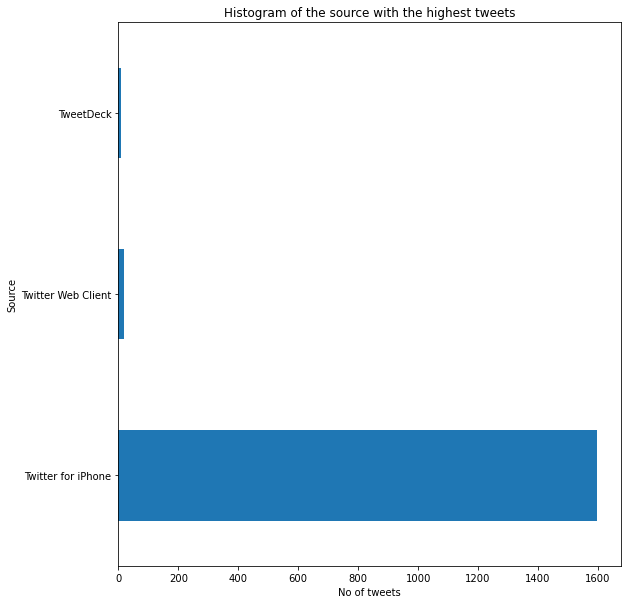

In [84]:
# plot showing the source with the highest number of tweets
df_twt_merge['source'].value_counts().plot(kind = 'barh', figsize = (9,10))
plt.title('Histogram of the source with the highest tweets')
plt.xlabel('No of tweets')
plt.ylabel('Source')

fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight');

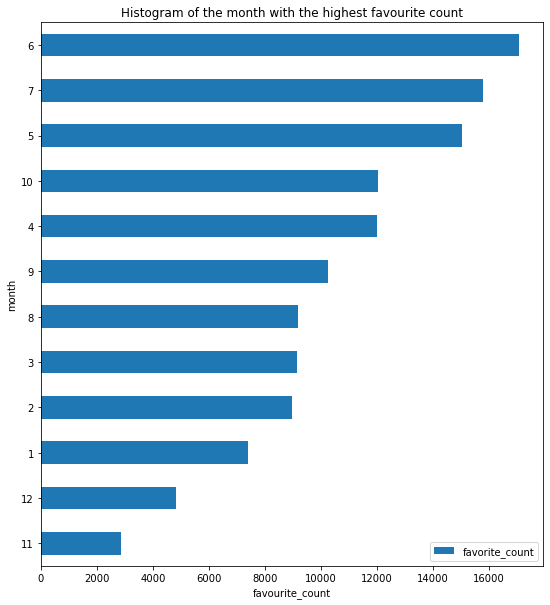

In [82]:
df_month_sorted.plot(kind = 'barh', figsize = (9,10))
plt.title('Histogram of the month with the highest favourite count')
plt.xlabel('favourite_count')
plt.ylabel('month')

fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight');